In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv('/content/train.csv')
df = df.drop(columns = 'id',axis = 1)

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df_cleansed = pd.get_dummies(data = df, columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'])

In [ ]:
df_cleansed.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,Overweight_Level_II,False,...,True,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,Normal_Weight,True,...,True,False,False,False,True,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,Insufficient_Weight,True,...,True,False,False,False,True,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,Obesity_Type_III,True,...,True,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,Overweight_Level_II,False,...,True,False,False,True,False,False,False,False,True,False


In [ ]:
df_cleansed.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [ ]:
df_final = df_cleansed.drop(columns = ['Gender_Male','family_history_with_overweight_yes','FAVC_yes','CAEC_Always','SMOKE_yes','SCC_yes','CALC_Frequently','MTRANS_Automobile'],axis = 1)

In [ ]:
df_final.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_Female', 'family_history_with_overweight_no',
       'FAVC_no', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_no',
       'SCC_no', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df_final['NObeyesdad']=le.fit_transform(df_final.NObeyesdad)
df_final.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,CAEC_Sometimes,CAEC_no,SMOKE_no,SCC_no,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,6,False,...,True,False,True,True,True,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,True,...,False,False,True,True,False,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,True,...,True,False,True,True,False,True,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,4,True,...,True,False,True,True,True,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,6,False,...,True,False,True,True,True,False,False,False,True,False


In [ ]:
X = df_final.drop(columns = 'NObeyesdad',axis = 1)
Y = df_final['NObeyesdad']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.16,stratify=Y)

#Using Logistic Regression


In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(X_test,Y_test)

0.7001806140878989

#Using Decision Tree

In [ ]:
tree_model = tree.DecisionTreeClassifier()

In [ ]:
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
tree_model.score(X_test,Y_test)

0.8506923540036123

#Using Random Forest

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
rf_model.score(X_test,Y_test)

0.8931366646598434

#Using SVM SVC

In [ ]:
svc_model = SVC(kernel = 'linear')

In [ ]:
svc_model.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
svc_model.score(X_test,Y_test)

0.8633353401565322

In [ ]:
sse = []
k_rng = range(15,40)
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(X_train)
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
sse

[11563.833443173744,
 11208.482042263884,
 10839.35284376557,
 10759.519909987506,
 10517.679187119422,
 10350.263611890998,
 10164.759480301163,
 10003.895905131172,
 9792.146347176673,
 9786.511566280738,
 9469.38240254408,
 9485.583191951646,
 9332.867687547729,
 9143.912133874055,
 9110.635730208312,
 8949.24103641785,
 8799.861530872193,
 8704.076227966772,
 8650.63762663776,
 8547.439774359433,
 8404.782224774783,
 8373.905239816093,
 8280.971185802075,
 8169.152377048422,
 8052.46528875305]

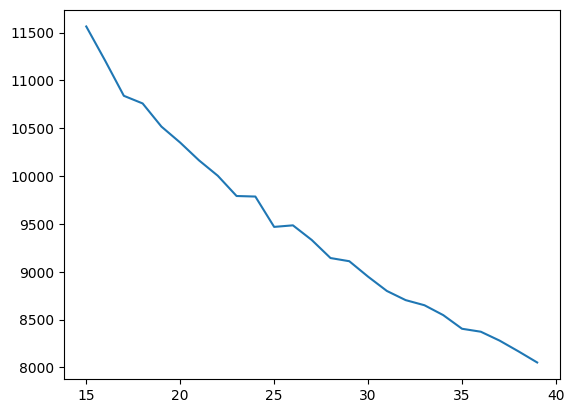

In [ ]:
plt.plot(k_rng,sse)

In [ ]:
Y_train.value_counts()

NObeyesdad
4    3399
3    2728
1    2589
2    2444
0    2119
6    2118
5    2039
Name: count, dtype: int64

In [ ]:
km = KMeans(n_clusters = 7)
km.fit(X_train)
Y_prediction = km.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
acc = accuracy_score(Y_prediction,Y_test)
print(acc)

0.14870559903672487


#Using K Nearest Neighbours

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
knn.score(X_test,Y_test)

0.8494882600842866

In [ ]:
y_predict = knn.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       404
           1       0.81      0.71      0.76       493
           2       0.84      0.85      0.85       466
           3       0.96      0.95      0.95       520
           4       0.98      0.99      0.98       647
           5       0.72      0.68      0.70       388
           6       0.71      0.74      0.73       404

    accuracy                           0.85      3322
   macro avg       0.83      0.84      0.83      3322
weighted avg       0.85      0.85      0.85      3322

